## Minería de Datos mediante el proceso SEMMA

### (Grupo 05)
Integrantes:

- Jhoeel Eddye Luna Acostupa
- Javier Eduardo Chalan Neira
- Neil Kevin Alvarado Vargas
- Manuel Jesus Guerrero Ojeda
- Jorge Luis Calagua Montoya

### 1. Sample (Muestrear)

In [1]:
from datetime import datetime

import pandas as pd
from pycaret.classification import setup, create_model, pull, predict_model, plot_model, finalize_model

In [2]:
df_inicial = pd.read_excel("sesion-01/Ejercicio_Aplicacion_SEMMA.xlsx")
df_inicial.head()

,CustomerKey,GeographyKey,CustomerAlternateKey,Title,FirstName,MiddleName,LastName,NameStyle,BirthDate,MaritalStatus,...,FrenchOccupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,AddressLine2,Phone,DateFirstPurchase,CommuteDistance,Region,BikeBuyer
0,11000,26,AW00011000,NaN,Jon,V,Yang,0,1986-10-06,M,...,Cadre,1,0,3761 N. 14th St,NaN,1 (11) 500 555-0162,2011-01-19,1-2 Miles,Pacific,1
1,11001,37,AW00011001,NaN,Eugene,L,Huang,0,1991-05-10,S,...,Cadre,0,1,2243 W St.,NaN,1 (11) 500 555-0110,2011-01-15,0-1 Miles,Pacific,1
2,11002,31,AW00011002,NaN,Ruben,NaN,Torres,0,1986-02-09,M,...,Cadre,1,1,5844 Linden Land,NaN,1 (11) 500 555-0184,2011-01-07,2-5 Miles,Pacific,1
3,11003,11,AW00011003,NaN,Christy,NaN,Zhu,0,1988-08-14,S,...,Cadre,0,1,1825 Village Pl.,NaN,1 (11) 500 555-0162,2010-12-29,5-10 Miles,Pacific,1
4,11004,19,AW00011004,NaN,Elizabeth,NaN,Johnson,0,1994-08-05,S,...,Cadre,1,4,7553 Harness Circle,NaN,1 (11) 500 555-0131,2011-01-23,1-2 Miles,Pacific,1


Se verifica el tamnho del conjunto de datos

In [3]:
df_inicial.shape

(18484, 31)

Se revisa el nombre de las columnas

In [4]:
df_inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18484 entries, 0 to 18483
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   CustomerKey           18484 non-null  int64         
 1   GeographyKey          18484 non-null  int64         
 2   CustomerAlternateKey  18484 non-null  object        
 3   Title                 101 non-null    object        
 4   FirstName             18484 non-null  object        
 5   MiddleName            10654 non-null  object        
 6   LastName              18484 non-null  object        
 7   NameStyle             18484 non-null  int64         
 8   BirthDate             18484 non-null  datetime64[ns]
 9   MaritalStatus         18484 non-null  object        
 10  Suffix                3 non-null      object        
 11  Gender                18484 non-null  object        
 12  EmailAddress          18484 non-null  object        
 13  YearlyIncome    

Se observan columnas redundantes de equivalencias de eduaci[on en otros idiomas.

In [5]:
cols_redundantes = ["EnglishEducation", "FrenchEducation", "EnglishOccupation", "FrenchOccupation"]

df = df_inicial.drop(columns=cols_redundantes, errors="ignore")
df.columns

Index(['CustomerKey', 'GeographyKey', 'CustomerAlternateKey', 'Title',
       'FirstName', 'MiddleName', 'LastName', 'NameStyle', 'BirthDate',
       'MaritalStatus', 'Suffix', 'Gender', 'EmailAddress', 'YearlyIncome',
       'TotalChildren', 'NumberChildrenAtHome', 'SpanishEducation',
       'SpanishOccupation', 'HouseOwnerFlag', 'NumberCarsOwned',
       'AddressLine1', 'AddressLine2', 'Phone', 'DateFirstPurchase',
       'CommuteDistance', 'Region', 'BikeBuyer'],
      dtype='object')

Hay que revisar si hay duplicados por llave de cliente

In [6]:
df[df.duplicated(subset=["CustomerKey"], keep=False)]

,CustomerKey,GeographyKey,CustomerAlternateKey,Title,FirstName,MiddleName,LastName,NameStyle,BirthDate,MaritalStatus,...,SpanishOccupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,AddressLine2,Phone,DateFirstPurchase,CommuteDistance,Region,BikeBuyer


In [7]:
# Dato extranho: si hay mas hijos totales que en casa
# filas_hijos = df[df["NumberChildrenAtHome"].fillna(0) > df["TotalChildren"].fillna(0)]
# len(filas_hijos)

Ahora, hay que revisar los valores nulos

## 2. Explore (Explorar)

In [8]:
df.isnull().sum()

CustomerKey                 0
GeographyKey                0
CustomerAlternateKey        0
Title                   18383
FirstName                   0
MiddleName               7830
LastName                    0
NameStyle                   0
BirthDate                   0
MaritalStatus               0
Suffix                  18481
Gender                      0
EmailAddress                0
YearlyIncome                0
TotalChildren               0
NumberChildrenAtHome        0
SpanishEducation            0
SpanishOccupation           0
HouseOwnerFlag              0
NumberCarsOwned             0
AddressLine1                0
AddressLine2            18172
Phone                       0
DateFirstPurchase           0
CommuteDistance             0
Region                      0
BikeBuyer                   0
dtype: int64

In [9]:
nulos_totales = df.isnull().sum()
(nulos_totales / len(df)) * 100

CustomerKey              0.000000
GeographyKey             0.000000
CustomerAlternateKey     0.000000
Title                   99.453581
FirstName                0.000000
MiddleName              42.360961
LastName                 0.000000
NameStyle                0.000000
BirthDate                0.000000
MaritalStatus            0.000000
Suffix                  99.983770
Gender                   0.000000
EmailAddress             0.000000
YearlyIncome             0.000000
TotalChildren            0.000000
NumberChildrenAtHome     0.000000
SpanishEducation         0.000000
SpanishOccupation        0.000000
HouseOwnerFlag           0.000000
NumberCarsOwned          0.000000
AddressLine1             0.000000
AddressLine2            98.312054
Phone                    0.000000
DateFirstPurchase        0.000000
CommuteDistance          0.000000
Region                   0.000000
BikeBuyer                0.000000
dtype: float64

Como no aportan informacion y son muchos nulls, se eliminaran

In [10]:
cardinalidades = {}
for columna in df.select_dtypes(include=["object", "category"]).columns:
    cardinalidades[columna] = df[columna].nunique()

print(cardinalidades)

{'CustomerAlternateKey': 18484, 'Title': 5, 'FirstName': 670, 'MiddleName': 44, 'LastName': 375, 'MaritalStatus': 2, 'Suffix': 1, 'Gender': 2, 'EmailAddress': 18484, 'SpanishEducation': 5, 'SpanishOccupation': 5, 'AddressLine1': 12802, 'AddressLine2': 166, 'Phone': 8890, 'CommuteDistance': 5, 'Region': 3}


Tambien, se elininaran las columnas con alta cardinalidad

In [11]:
cols_descartables = [
    "Title", "MiddleName", "Suffix", "AddressLine2",  # nulos sin valor
    "CustomerAlternateKey", "FirstName", "LastName", "MiddleName",  # cols de alta cardinalidad
    "Suffix", "EmailAddress", "AddressLine1", "AddressLine2", "Phone"  # cols de alta cardinalidad
]

df_medio = df.drop(columns=cols_descartables, errors="ignore")
df_medio.columns

Index(['CustomerKey', 'GeographyKey', 'NameStyle', 'BirthDate',
       'MaritalStatus', 'Gender', 'YearlyIncome', 'TotalChildren',
       'NumberChildrenAtHome', 'SpanishEducation', 'SpanishOccupation',
       'HouseOwnerFlag', 'NumberCarsOwned', 'DateFirstPurchase',
       'CommuteDistance', 'Region', 'BikeBuyer'],
      dtype='object')

Revision de outliers

In [12]:
ingreso_min = df_medio["YearlyIncome"].min()
ingreso_max = df_medio["YearlyIncome"].max()
ingreso_media = df_medio["YearlyIncome"].mean()
ingreso_q1 = df_medio["YearlyIncome"].quantile(0.25)
ingreso_q3 = df_medio["YearlyIncome"].quantile(0.75)
rango_intercuartil = ingreso_q3 - ingreso_q1

limite_inferior = ingreso_q1 - 1.5 * rango_intercuartil
limite_superior = ingreso_q3 + 1.5 * rango_intercuartil

outliers = df_medio[(df_medio["YearlyIncome"] < limite_inferior) | (df_medio["YearlyIncome"] > limite_superior)]

total_registros = len(df_medio)
total_outliers = len(outliers)
porcentaje_outliers = (total_outliers / total_registros) * 100

print("Rango: de", ingreso_min, "a", ingreso_max)
print("Media:", ingreso_media)
print("Outliers:", total_outliers)
print("Porcentaje:", porcentaje_outliers, "%")


Rango: de 10000 a 170000
Media: 57305.77797013633
Outliers: 309
Porcentaje: 1.671716078770829 %


Revision de balance de clases del target

In [13]:
df_medio["BikeBuyer"].value_counts(normalize=True) * 100

BikeBuyer
0    50.595109
1    49.404891
Name: proportion, dtype: float64

## 3. Modify (Modificar)

Se removeran los outliers puesto que represntan menos del 5% del total de muestras

In [14]:
print(len(df_medio))
df_sin_outliers = df_medio[(df_medio["YearlyIncome"] >= limite_inferior) & (df_medio["YearlyIncome"] <= limite_superior)]
print(len(df_sin_outliers))

18484
18175


Revisar distribucion de edades

In [15]:
fecha_actual = datetime.now()
df_sin_outliers["Edad"] = df_sin_outliers["BirthDate"].apply(lambda x: (fecha_actual - pd.to_datetime(x)).days // 365)
df_sin_outliers["Edad"].describe()

count    18175.000000
mean        40.769354
std         11.545283
min         24.000000
25%         31.000000
50%         39.000000
75%         48.000000
max         94.000000
Name: Edad, dtype: float64

Parece que los outliers de edad entre 80 a 94 anhos son posibles.

Se hara ingenieria de caracteristicas a la fecha para obtener edades

In [16]:
df_final = df_sin_outliers.copy()
df_final["Edad"] = (fecha_actual - pd.to_datetime(df_final["BirthDate"])).dt.days // 365

df_final.sample(5, random_state=42)

,CustomerKey,GeographyKey,NameStyle,BirthDate,MaritalStatus,Gender,YearlyIncome,TotalChildren,NumberChildrenAtHome,SpanishEducation,SpanishOccupation,HouseOwnerFlag,NumberCarsOwned,DateFirstPurchase,CommuteDistance,Region,BikeBuyer,Edad
750,11750,10,0,1999-09-17,M,F,60000,2,2,Licenciatura,Profesional,1,1,2011-07-14,0-1 Miles,Pacific,1,25
11271,22271,336,0,1995-02-21,M,M,80000,3,0,Estudios de postgrado,Profesional,1,0,2013-06-19,0-1 Miles,North America,1,30
14268,25268,15,0,1959-08-11,M,M,60000,2,0,Estudios de postgrado,Gestión,0,1,2013-09-21,0-1 Miles,Pacific,0,66
4356,15356,167,0,1975-10-16,M,F,120000,3,4,Educación secundaria (en curso),Profesional,1,4,2013-03-07,10+ Miles,Europe,0,49
12626,23626,207,0,1970-09-08,S,M,90000,4,1,Educación secundaria,Gestión,1,3,2013-07-24,10+ Miles,Europe,0,55


## 4. Model (Modelar)

In [17]:
df_final.columns

Index(['CustomerKey', 'GeographyKey', 'NameStyle', 'BirthDate',
       'MaritalStatus', 'Gender', 'YearlyIncome', 'TotalChildren',
       'NumberChildrenAtHome', 'SpanishEducation', 'SpanishOccupation',
       'HouseOwnerFlag', 'NumberCarsOwned', 'DateFirstPurchase',
       'CommuteDistance', 'Region', 'BikeBuyer', 'Edad'],
      dtype='object')

In [18]:
columna_objetivo = "BikeBuyer"

columnas_ignoradas = [
    "CustomerKey",
    "GeographyKey",
    "BirthDate",
    "DateFirstPurchase"
]

columnas_categoricas = [
    "NameStyle",
    "MaritalStatus",
    "Gender",
    "SpanishEducation",
    "SpanishOccupation",
    "HouseOwnerFlag",
    "CommuteDistance",
    "Region"
]

columnas_numericas = [
    "YearlyIncome",
    "TotalChildren",
    "NumberChildrenAtHome",
    "NumberCarsOwned",
    "Edad"
]

configuracion = setup(
    data=df_final,
    target=columna_objetivo,
    fold_strategy="stratifiedkfold",
    fold=5,
    session_id=42,
    categorical_features=columnas_categoricas,
    numeric_features=columnas_numericas,
    ignore_features=columnas_ignoradas,
    imputation_type="simple",
    numeric_imputation="median",
    categorical_imputation="constant",
    data_split_shuffle=True,
    data_split_stratify=True,
    fix_imbalance=False
)

,Description,Value
0,Session id,42
1,Target,BikeBuyer
2,Target type,Binary
3,Original data shape,"(18175, 18)"
4,Transformed data shape,"(18175, 28)"
5,Transformed train set shape,"(12722, 28)"
6,Transformed test set shape,"(5453, 28)"
7,Ignore features,4
8,Numeric features,5
9,Categorical features,8


In [19]:
modelo_regresion_logistica = create_model("lr")
resultados_regresion_logistica = pull()

modelo_bosque_aleatorio = create_model("rf")
resultados_bosque_aleatorio = pull()

modelo_gradient_boosting = create_model("gbc")
resultados_gradient_boosting = pull()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6389,0.6838,0.6366,0.6320,0.6343,0.2777,0.2777
1,0.6507,0.6957,0.6616,0.6406,0.6510,0.3016,0.3017
2,0.6667,0.7122,0.6725,0.6578,0.6651,0.3334,0.3335
3,0.6490,0.6987,0.6637,0.6378,0.6505,0.2982,0.2985
4,0.6392,0.6958,0.6486,0.6295,0.6389,0.2785,0.2786
Mean,0.6489,0.6972,0.6566,0.6395,0.6479,0.2979,0.2980
Std,0.0101,0.0091,0.0126,0.0100,0.0108,0.0203,0.0203


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7784,0.8495,0.7796,0.7722,0.7758,0.5567,0.5568
1,0.7804,0.8561,0.7733,0.7789,0.7761,0.5606,0.5606
2,0.7795,0.8525,0.7652,0.7820,0.7735,0.5587,0.5588
3,0.7917,0.8573,0.7875,0.7888,0.7882,0.5832,0.5832
4,0.7893,0.8545,0.7700,0.7954,0.7825,0.5783,0.5786
Mean,0.7838,0.8540,0.7751,0.7835,0.7792,0.5675,0.5676
Std,0.0055,0.0028,0.0078,0.0080,0.0054,0.0110,0.0110


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7147,0.7930,0.7196,0.7061,0.7128,0.4295,0.4296
1,0.7281,0.7989,0.7486,0.7133,0.7305,0.4565,0.4570
2,0.7288,0.8048,0.7452,0.7155,0.7300,0.4578,0.4581
3,0.7264,0.7985,0.7404,0.7142,0.7271,0.4530,0.4533
4,0.7197,0.8007,0.7404,0.7049,0.7222,0.4398,0.4403
Mean,0.7236,0.7992,0.7389,0.7108,0.7245,0.4473,0.4477
Std,0.0054,0.0038,0.0101,0.0044,0.0066,0.0110,0.0110


## 5. Assess (Evaluar)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.6475,0.6935,0.6508,0.6393,0.6450,0.2951,0.2951


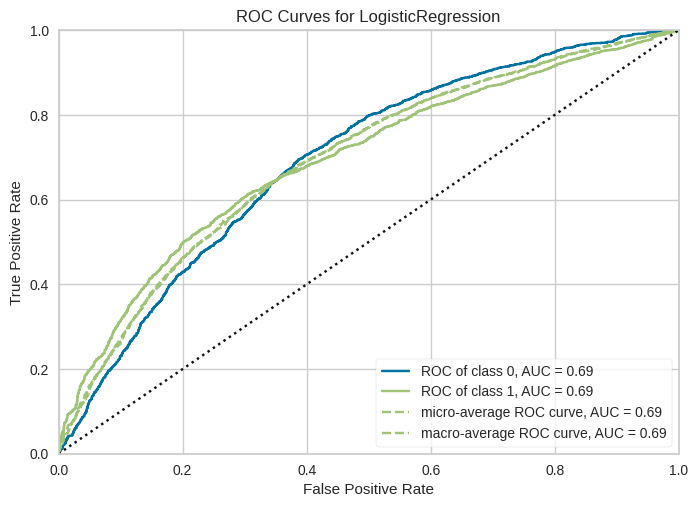

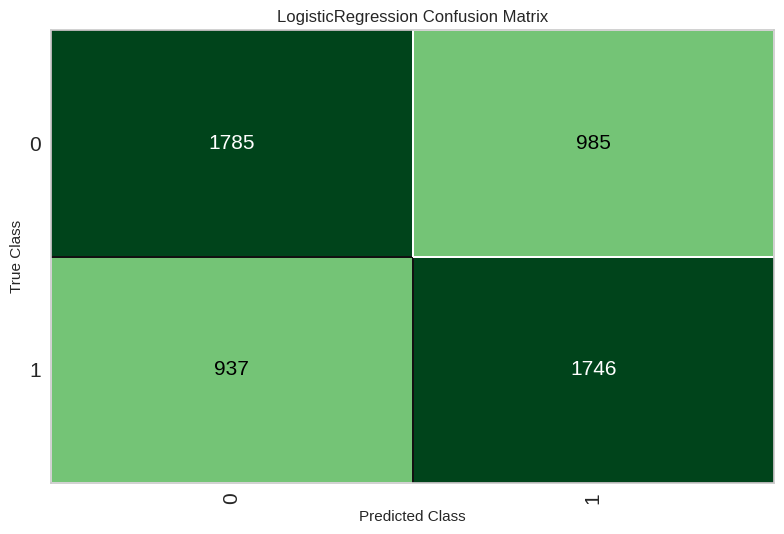

In [20]:
predicciones_lr = predict_model(modelo_regresion_logistica)
plot_model(modelo_regresion_logistica, plot="auc")
plot_model(modelo_regresion_logistica, plot="confusion_matrix")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.7924,0.8654,0.7857,0.7910,0.7883,0.5847,0.5847


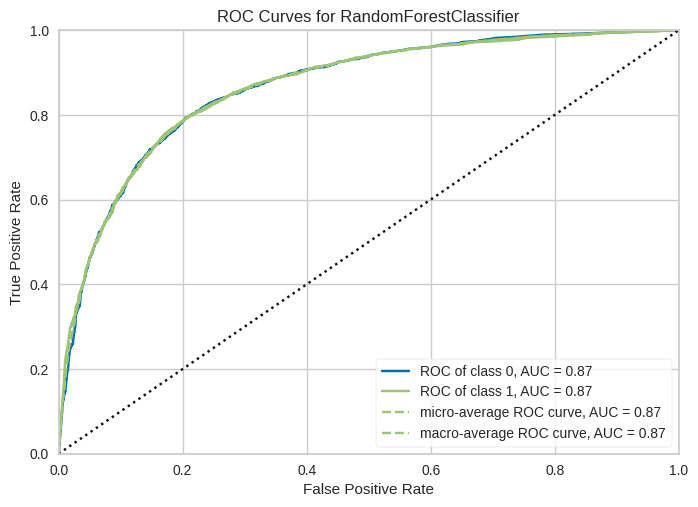

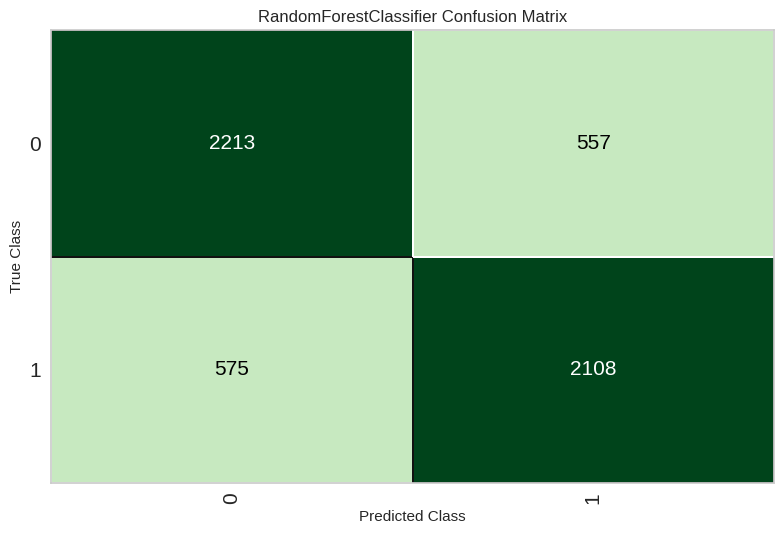

In [21]:
predicciones_rf = predict_model(modelo_bosque_aleatorio)
plot_model(modelo_bosque_aleatorio, plot="auc")
plot_model(modelo_bosque_aleatorio, plot="confusion_matrix")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.7240,0.7981,0.7313,0.7145,0.7228,0.4481,0.4482


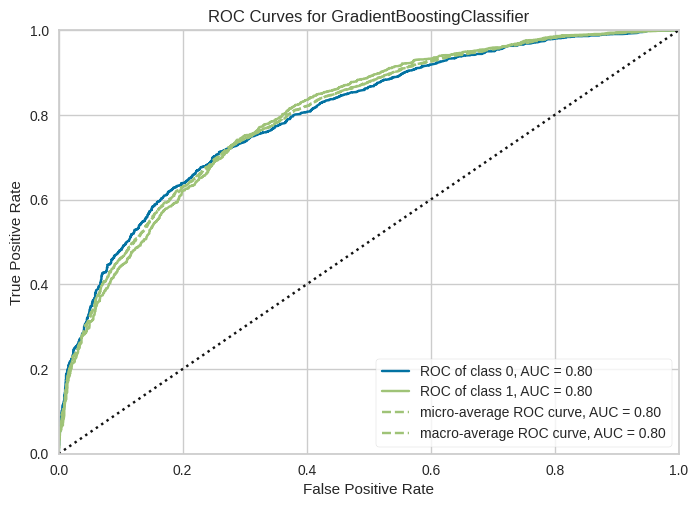

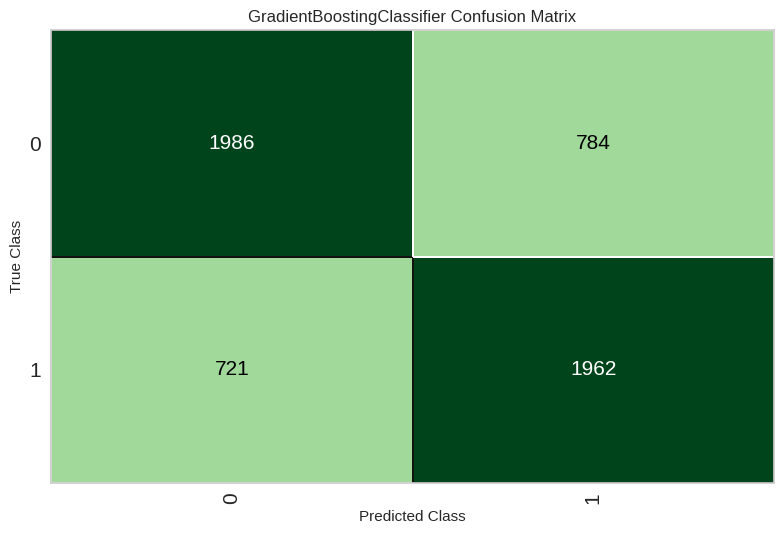

In [22]:
predicciones_gb = predict_model(modelo_gradient_boosting)
plot_model(modelo_gradient_boosting, plot="auc")
plot_model(modelo_gradient_boosting, plot="confusion_matrix")

Conclusion: de acuerdo a las metricas, el mejor modelo es el Random Forest puesto que tiene mejor discriminación: AUC 0.854 (distingue mejor compradores vs. no compradores) y tiene mayor desempenho global